In [1]:
# Libraries
import numpy as np
import pandas as pd
from datetime import datetime as dt
from scipy import stats
import statsmodels.formula.api as sm_formula
import statsmodels.api as sm
from scipy import stats
import scipy
import math
import matplotlib.pyplot as plt
%matplotlib inline

### Check that the sum of squares of N(0,1) follows a chi-square distribution

In [2]:
m=5000 # samples of N(0,1)
n=7   # degrees of freedom

In [3]:
sample = np.random.normal(0, 1, m*n).reshape(m,n)
sample2 = sample*sample

count    5000.000000
mean        7.059428
std         3.800878
min         0.278687
25%         4.312445
50%         6.429937
75%         9.127211
max        36.319667
dtype: float64

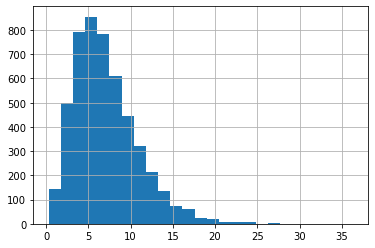

In [4]:
sums = sample2.sum(axis=1)
pd.Series(sums).hist(bins=25)
pd.Series(sums).describe()

count    5000.000000
mean        7.041847
std         3.824408
min         0.328427
25%         4.268125
50%         6.335174
75%         9.089758
max        30.014672
dtype: float64

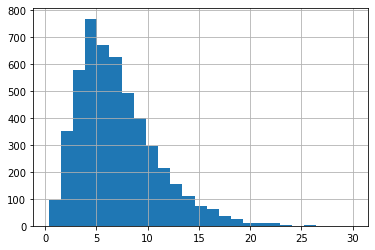

In [5]:
sample3 = np.random.chisquare(n,m)
pd.Series(sample3).hist(bins=25)
pd.Series(sample3).describe()

count    5000.000000
mean        0.017581
std         5.350009
min       -21.450166
25%        -3.292298
50%        -0.026712
75%         3.343250
max        33.256445
dtype: float64
Difference is centered in 0 and errors follow a normal curve


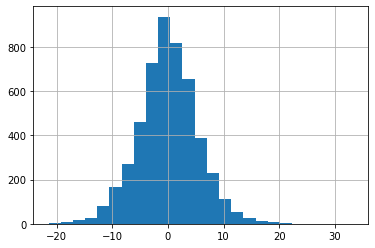

In [6]:
# Comprobation
diff = sums - sample3
pd.Series(diff).hist(bins=25)
print(pd.Series(diff).describe())
print("Difference is centered in 0 and errors follow a normal curve")

### Check that from the ratio of a z distribution and the root of a chi-square distribution we obtain a t distribution

In [7]:
m=5000 # samples of N(0,1)
n=7   # degrees of freedom

In [8]:
samplez = np.random.normal(0, 1, m)
samplechi2 = np.random.chisquare(n,m)
samplechi2n = np.sqrt(np.random.chisquare(n,m)/n)
t = samplez / samplechi2n

count    5000.000000
mean        0.007410
std         1.189149
min        -6.151738
25%        -0.702340
50%         0.008064
75%         0.745447
max         7.682144
dtype: float64

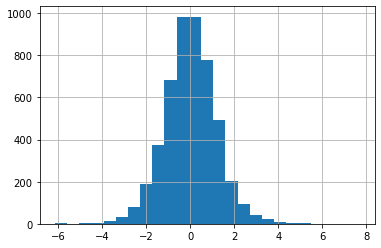

In [9]:
pd.Series(t).hist(bins=25)
pd.Series(t).describe()

In [10]:
samplet = np.random.standard_t(n, m)

count    5000.000000
mean       -0.037005
std         1.156480
min        -6.339743
25%        -0.706783
50%        -0.012328
75%         0.666152
max         6.066490
dtype: float64

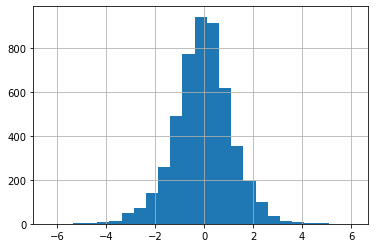

In [11]:
pd.Series(samplet).hist(bins=25)
pd.Series(samplet).describe()

count    5000.000000
mean        0.044415
std         1.665544
min        -6.803847
25%        -1.018845
50%         0.034856
75%         1.086013
max         8.354617
dtype: float64
Difference is centered in 0 and errors follow a normal curve


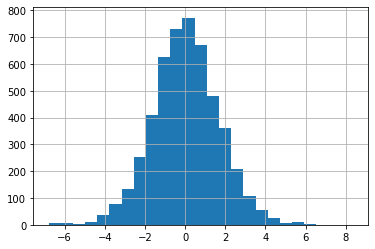

In [12]:
# Comprobation
diff = t - samplet
pd.Series(diff).hist(bins=25)
print(pd.Series(diff).describe())
print("Difference is centered in 0 and errors follow a normal curve")

### Punctual estimation

In [13]:
nterm = [587,470,676,451,436,672,584,697,408]

In [14]:
np.mean(nterm)

553.4444444444445

In [15]:
np.std(nterm,ddof=1)

114.09876326138587

In [16]:
np.std(nterm,ddof=1)/np.sqrt(len(nterm))

38.03292108712862

### Confidence interval for the mean, stdev unknown

In [17]:
nterm = [587,470,676,451,436,672,584,697,408]
n = 9
sigma = 100

In [18]:
scipy.stats.norm.ppf(0.975)

1.959963984540054

In [19]:
np.mean(nterm) + scipy.stats.norm.ppf(0.975)*sigma/np.sqrt(n)

618.7765772624463

In [20]:
np.mean(nterm) + scipy.stats.t.ppf(0.975,8)*np.std(nterm,ddof=1)/np.sqrt(n)

641.1485177387609

In [21]:
scipy.stats.t.cdf(3,8)

0.9914641593831087

### Check that the quotient of two chi-square distributions divided by its degrees of freedom is a F distribution

In [22]:
m=5000 # samples of N(0,1)
n1=5   # degrees of freedom
n2=7 

In [23]:
samplechi2n1 = np.random.chisquare(n1,m)
samplechi2n2 = np.random.chisquare(n2,m)
f = (samplechi2n1 / n1) / (samplechi2n2 / n2)

count    5000.000000
mean        1.409050
std         1.583864
min         0.007490
25%         0.523708
50%         0.958402
75%         1.715500
max        27.298210
dtype: float64

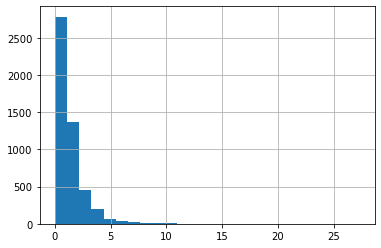

In [24]:
pd.Series(f).hist(bins=25)
pd.Series(f).describe()

count    5000.000000
mean        1.403216
std         1.473615
min         0.016032
25%         0.540155
50%         0.966261
75%         1.727195
max        17.061167
dtype: float64

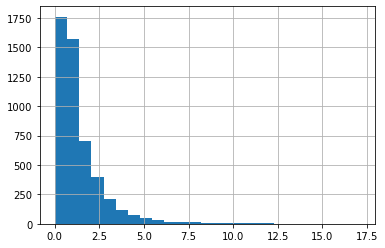

In [25]:
samplef = np.random.f(n1, n2, m)
pd.Series(samplef).hist(bins=25)
pd.Series(samplef).describe()

count    5000.000000
mean        0.005834
std         2.167361
min       -16.965925
25%        -0.791647
50%        -0.003428
75%         0.777507
max        26.697178
dtype: float64
Difference is centered in 0 and errors follow a normal curve


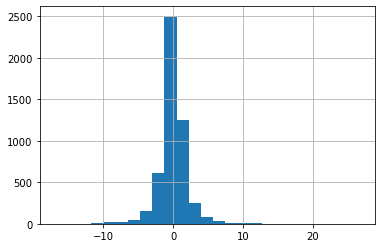

In [26]:
# Comprobation
diff = f - samplef
pd.Series(diff).hist(bins=25)
print(pd.Series(diff).describe())
print("Difference is centered in 0 and errors follow a normal curve")

In [27]:
scipy.stats.f.ppf(0.99,10,5)

10.05101721957127

In [28]:
1-scipy.stats.f.cdf(10.05,10,5)

0.01000227680994581

In [29]:
scipy.stats.t.cdf(2.58,148)

0.9945733337151855